In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


/home/isai/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
EPOCHS = 200

# x and y coordinates to plot 
x_coordinates = np.linspace(0, EPOCHS, num=EPOCHS)
loss_y_coordinates = np.zeros(EPOCHS)
accuracy_y_coordinates = np.zeros(EPOCHS)

def plot(x, y, limits, title, x_label_name, y_label_name):
    plt.close("all")
    figure = plt.figure()
    figure.clf()
    
    plt.plot(x, y)
    
    #plt.axis(limits)
    plt.ylabel(y_label_name)
    plt.xlabel(x_label_name)

    figure.suptitle(title, fontsize=20)
    plt.legend(loc='upper right')
    
    plt.show()
    return

def plot_loss():
    limits = [0,EPOCHS,0,5]
    plot(x_coordinates, loss_y_coordinates, limits, "Training Loss Overtime", "Epochs", "Loss")  
    return

def plot_accuracy():
    limits = [0,EPOCHS,0,1]
    plot(x_coordinates, accuracy_y_coordinates, limits, "Test Set Accuracy Overtime", "Epochs", "Accuracy")
    return

In [4]:
X_matrix = tf.placeholder(tf.float32, [None, 784])
t_vector = tf.placeholder(tf.float32, [None, 10])

W_matrix = tf.Variable(tf.zeros([784, 10]), name="W_matrix")
b_vector = tf.Variable(tf.zeros([10]), name="b_vector")

p_vector = tf.nn.softmax(tf.matmul(X_matrix, W_matrix) + b_vector) # This is a linear classifier
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t_vector * tf.log(p_vector), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(t_vector,1), tf.argmax(p_vector,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for epoch in range(EPOCHS):
    features_train, targets_train = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={X_matrix: features_train, t_vector: targets_train})
    
    features_test, targets_test = mnist.test.images, mnist.test.labels
    l_scalar = sess.run(cross_entropy, feed_dict={X_matrix: features_test, t_vector: targets_test})
    a_scalar = sess.run(accuracy, feed_dict={X_matrix: features_test, t_vector: targets_test})
    
    loss_y_coordinates[epoch] = l_scalar
    accuracy_y_coordinates[epoch] = a_scalar

/home/isai/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


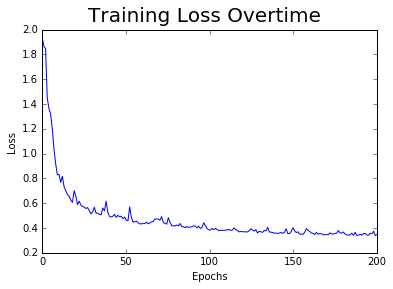

In [5]:
plot_loss()

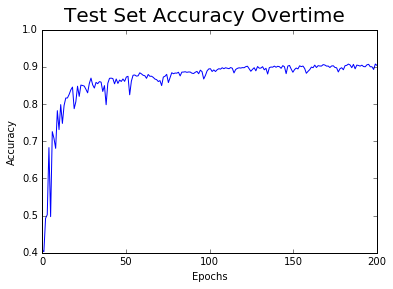

In [6]:
plot_accuracy()

In [7]:
mean_accuracy = np.mean(accuracy_y_coordinates)

print("Test Set Mean Accuracy")
print(mean_accuracy)

Test Set Mean Accuracy
0.864875501543


In [8]:
saver = tf.train.Saver()
save_path = saver.save(sess, "./Trained_Model/mnist_liner_classifier_model.ckpt")